In [ ]:
import pandas as pd

email_data = pd.read_csv('C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/FYP PART 1/cleaned_email_data.csv')

email_data['Date & Time'] = pd.to_datetime(email_data['Date & Time'])

: 

In [9]:
email_data.info(memory_usage='deep') 
print("Number of Rows and Columns: ", email_data.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253174 entries, 0 to 253173
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   From                253174 non-null  object        
 1   To                  243284 non-null  object        
 2   Subject             244468 non-null  object        
 3   Message             253174 non-null  object        
 4   Day                 253174 non-null  object        
 5   Date & Time         253174 non-null  datetime64[ns]
 6   Response Time       253174 non-null  object        
 7   Extracted Metadata  253174 non-null  object        
 8   Cleaned_Message     252668 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 732.8 MB
Number of Rows and Columns:  (253174, 9)


In [ ]:
email_data

In [3]:
email_data = email_data[email_data['Date & Time'].dt.year <= 2023]

In [5]:
import plotly.express as px

email_data['Date & Time'] = pd.to_datetime(email_data['Date & Time'])

email_data['Date'] = email_data['Date & Time'].dt.date

message_frequency = email_data.groupby('Date').size().reset_index(name='Message Count')

fig = px.scatter(message_frequency, x='Date', y='Message Count', title='Message Frequency by Date')
fig.show()

In [86]:
fig = px.line(message_frequency, x='Date', y='Message Count', title='Message Frequency Trend by Date')
fig.show()

In [87]:
day_counts = email_data['Day'].value_counts().reset_index()
day_counts.columns = ['Day', 'Count']

fig = px.bar(day_counts, x='Day', y='Count', title='Email Frequency by Day of the Week')
fig.show()

In [88]:
email_data['Year'] = email_data['Date & Time'].dt.year

day_year_counts = email_data.groupby(['Year', 'Day']).size().reset_index(name='Count')

fig = px.bar(day_year_counts, x='Day', y='Count', color='Year', 
             title='Message Frequency by Day of the Week for Each Year',
             barmode='group')
fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10644\312580399.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [90]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
email_data['Day'] = pd.Categorical(email_data['Day'], categories=day_order, ordered=True)

day_year_counts = email_data.groupby(['Year', 'Day']).size().reset_index(name='Count')

fig = px.area(day_year_counts, x='Day', y='Count', color='Year', 
              title='Message Frequency by Day of the Week for Each Year (Stacked Area)', 
              category_orders={'Day': day_order})
fig.show()




C:\Users\User\AppData\Local\Temp\ipykernel_10644\1213640901.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
fig = px.line(day_year_counts, x='Day', y='Count', color='Year', 
              title='Message Frequency by Day of the Week for Each Year (Line Plot)', 
              markers=True, 
              category_orders={'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']})

fig.show()


In [ ]:
from_counts = email_data['From'].value_counts().reset_index()
from_counts.columns = ['Sender', 'Email Count']

top_15_senders = from_counts.head(15)

fig = px.bar(top_15_senders, x='Sender', y='Email Count', title='Top 15 Email Senders',
             labels={'Sender': 'Sender', 'Email Count': 'Number of Emails'},
             color='Email Count',  
             color_continuous_scale='Viridis', 
             text='Email Count')  

fig.update_traces(texttemplate='%{text}', textposition='outside', showlegend=False)
fig.show()

In [ ]:
to_counts = email_data['To'].value_counts().reset_index()
to_counts.columns = ['Recipient', 'Email Count']

top_15_recipients = to_counts.head(15)

fig = px.bar(top_15_recipients, x='Recipient', y='Email Count', title='Top 15 Email Recipients',
             labels={'Recipient': 'Recipient', 'Email Count': 'Number of Emails'},
             color='Email Count', 
             color_continuous_scale='Viridis', 
             text='Email Count')  

fig.update_traces(texttemplate='%{text}', textposition='outside', showlegend=False)

fig.show()

In [99]:
email_data['Message Length'] = email_data['Message'].apply(len)
fig = px.histogram(email_data, x='Message Length', nbins=50, title='Distribution of Email Length')
fig.show()

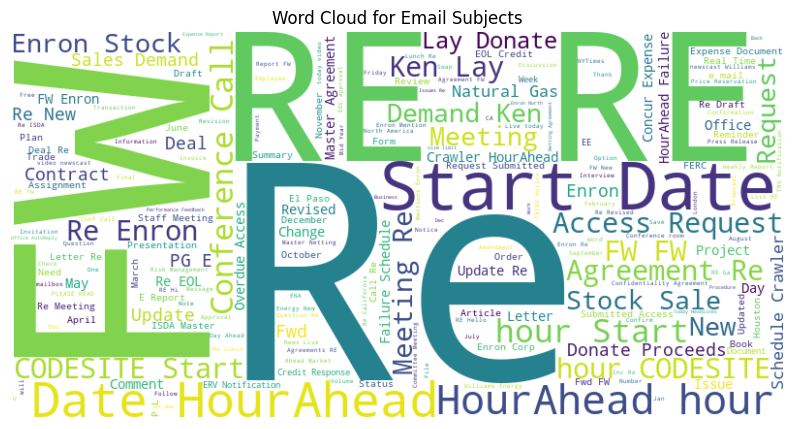

In [ ]:
from wordcloud import WordCloud

text = " ".join(email_data['Subject'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Email Subjects")
plt.show()


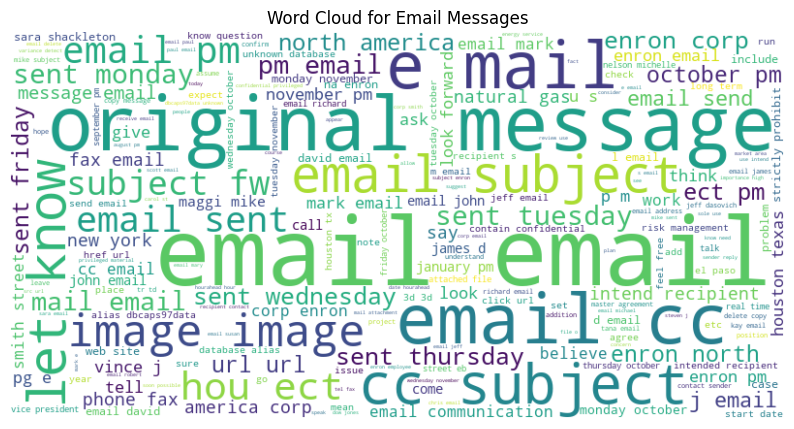

In [ ]:
text = " ".join(email_data['Cleaned_Message'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Email Messages")
plt.show()